In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#octree_nca = r"/local/scratch/clmn1/octree_study/Experiments/new_prostate_overkill5_OctreeNCASegmentation"
octree_nca = r"/local/scratch/clmn1/octree_study/Experiments/new_prostate_overkill6_OctreeNCASegmentation"
#octree_nca = r"/local/scratch/clmn1/octree_study/Experiments/new_prostate_copied_OctreeNCASegmentation"
m3d_nca = r"/local/scratch/clmn1/octree_study/Experiments/new_prostate_m3d_M3dSegmentation"
unet = r"/local/scratch/clmn1/octree_study/Experiments/new_prostate_unet_3d_8_UNetSegmentation"


augmentations = ["RandomGhosting", "RandomAnisotropy","RandomBiasField",
                 "RandomNoise", "RandomBlur",]
#augmentations = ["RandomGhosting", "RandomAnisotropy"]

augmentation_name = augmentations[1]

all_files = []
for augmentation_name in augmentations:
    for model in ["octree_nca", "unet", "m3d_nca"]:
        eval_file = pd.read_csv(f"{eval(model)}/eval/standard.csv", sep='\t')
        eval_file["severity"] = 0
        eval_file["model"] = model
        eval_file["augmentation"] = augmentation_name
        all_files.append(eval_file)
        for severity in range(1, 6):
            eval_file = pd.read_csv(f"{eval(model)}/eval/{augmentation_name}_{severity}.csv", sep='\t')
            eval_file["severity"] = severity
            eval_file["model"] = model
            eval_file["augmentation"] = augmentation_name
            all_files.append(eval_file)

all_files = pd.concat(all_files)

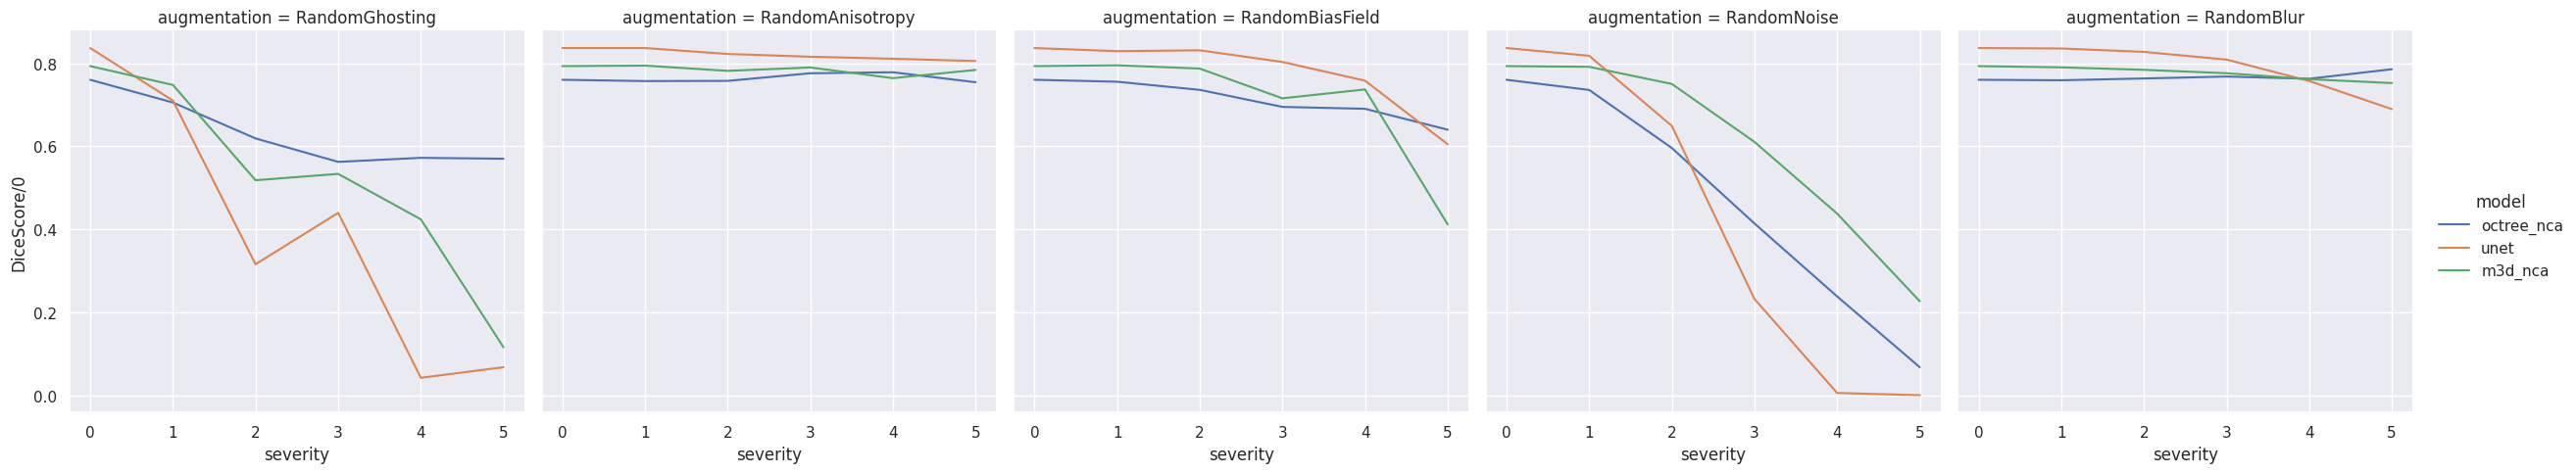

In [3]:
sns.set_theme(style="darkgrid")
sns.relplot(data=all_files, x="severity", y="DiceScore/0", hue="model", errorbar=None,
             col="augmentation", kind="line")